# Подготовка

In [1]:
#!pip install psycopg2-binary

In [2]:
#!pip3 install psycopg2

In [3]:
from matplotlib import pyplot as plt

In [4]:
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'challenge_user', # имя пользователя
             'pwd': 'aT00GAh944YU4Q1J4zbzryW6Yrz11iq54coz', # пароль
             'host': 'rc1a-eqy3nymy2wp6tbx2.mdb.yandexcloud.net', # адрес сервера
             'port': 6432, # порт подключения
             'db': 'data-analyst-challenge'}# название базы данных
 
# Формируем строку соединения с БД.
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                             db_config['pwd'],
                                             db_config['host'],
                                             db_config['port'],
                                             db_config['db'])
# Подключаемся к БД.
engine = create_engine(connection_string)

# Формируем sql-запрос(пример).
query = ''' 
        with t1 as 
                (select date_created,
                        user_id,
                        flt.lesson_id,
                        profession_name
                from finished_lesson_test flt
                join  lesson_index_test lit
                on flt.lesson_id = lit.lesson_id
                where date_created BETWEEN '01.04.2020' and '01.05.2020'
                and profession_name = 'data-analyst'
                ),
        t2 as (
            select *, 
                LEAD(date_created) OVER(partition by user_id ORDER BY date_created) as next_date
            from t1
        )
        select floor(EXTRACT(EPOCH FROM (next_date - date_created))) AS delta_seconds, date_created as lesson_datetime, lesson_id, next_date as next_lesson_datetime, profession_name, user_id
        from t2
        where EXTRACT(EPOCH FROM (next_date - date_created)) < 5
        --and user_id = next_user */
        '''

query2 = ''' 
        with t1 as 
                (select date_created,
                        user_id,
                        flt.lesson_id,
                        profession_name
                from finished_lesson_test flt
                join  lesson_index_test lit
                on flt.lesson_id = lit.lesson_id
                where date_created BETWEEN '01.04.2020' and '01.05.2020'
                and profession_name = 'data-analyst'
                ),
        t2 as (
            select *, 
                LEAD(date_created) OVER(partition by user_id ORDER BY date_created) as next_date
            from t1
        )
        select floor(EXTRACT(EPOCH FROM (next_date - date_created))) AS delta_seconds, date_created as lesson_datetime, lesson_id, next_date as next_lesson_datetime, profession_name, user_id
        from t2
        --where EXTRACT(EPOCH FROM (next_date - date_created)) >= 5
        --and user_id = next_user */
        '''
# Выполняем запрос и сохраняем результат
# выполнения в DataFrame.
# Sqlalchemy автоматически установит названия колонок
# такими же, как у таблицы в БД.
data_raw = pd.io.sql.read_sql(query, con = engine)
data_raw2 = pd.io.sql.read_sql(query2, con = engine)
print(data_raw.head(5))

   delta_seconds                  lesson_datetime  \
0            4.0 2020-04-16 14:41:54.781518+00:00   
1            4.0 2020-04-12 13:27:55.500944+00:00   
2            4.0 2020-04-12 13:27:59.958522+00:00   
3            4.0 2020-04-12 13:28:04.474273+00:00   
4            3.0 2020-04-12 13:36:33.836217+00:00   

                              lesson_id             next_lesson_datetime  \
0  24d355f6-4f88-4c05-bf51-e0e1db42f184 2020-04-16 14:41:59.139353+00:00   
1  b65b6ada-b087-44ba-b66d-74a05b96e8b7 2020-04-12 13:27:59.958522+00:00   
2  cec6f205-490c-4e36-8167-53db63585876 2020-04-12 13:28:04.474273+00:00   
3  b1505742-72ef-456f-b3f6-932461fadce6 2020-04-12 13:28:08.548023+00:00   
4  d0162814-ae0a-4c0c-8e60-22ecf53c5348 2020-04-12 13:36:37.763311+00:00   

  profession_name  user_id  
0    data-analyst     4409  
1    data-analyst    16144  
2    data-analyst    16144  
3    data-analyst    16144  
4    data-analyst    16144  


In [5]:
df = data_raw
df1 = data_raw2

In [6]:
df1.columns

Index(['delta_seconds', 'lesson_datetime', 'lesson_id', 'next_lesson_datetime',
       'profession_name', 'user_id'],
      dtype='object')

In [7]:
import numpy as np

In [8]:
df1[(df1['delta_seconds'] < 5)].shape[0]

226

In [9]:
df1[df1['delta_seconds'].isna()]

,delta_seconds,lesson_datetime,lesson_id,next_lesson_datetime,profession_name,user_id
7,NaN,2020-04-30 12:10:27.144257+00:00,e08c3d4a-a46b-4775-9f05-5fd94cac53a0,NaT,data-analyst,493
13,NaN,2020-04-15 17:08:49.029398+00:00,bb3ff463-8ada-4850-86a1-3b0ebca17488,NaT,data-analyst,1388
18,NaN,2020-04-20 17:12:44.511085+00:00,3c365926-e395-4e7c-9d7a-4fb97bb145f9,NaT,data-analyst,1686
32,NaN,2020-04-21 17:20:35.365432+00:00,f47f257b-9f50-4221-91b1-b50b536ed82f,NaT,data-analyst,2073
66,NaN,2020-04-13 10:20:07.764432+00:00,7f822db5-7360-4f5c-b452-75b25aa3d658,NaT,data-analyst,2095
...,...,...,...,...,...,...
173753,NaN,2020-04-30 20:33:00.414831+00:00,7a13f8d7-0883-4060-a1b0-9b33ca37f678,NaT,data-analyst,1702287
173754,NaN,2020-04-30 20:11:43.147001+00:00,7a13f8d7-0883-4060-a1b0-9b33ca37f678,NaT,data-analyst,1702294
173762,NaN,2020-04-30 20:41:23.308869+00:00,e08c3d4a-a46b-4775-9f05-5fd94cac53a0,NaT,data-analyst,1702318
173763,NaN,2020-04-30 20:39:06.590500+00:00,7a13f8d7-0883-4060-a1b0-9b33ca37f678,NaT,data-analyst,1702360


In [10]:
df2 = df1.dropna(subset = ['delta_seconds'])

In [11]:
sizes = np.array([\
df2[(df2['delta_seconds'] >= 60)].shape[0],\
df2[(df2['delta_seconds'] < 60) & (df1['delta_seconds'] >= 5)].shape[0], \
df2[(df2['delta_seconds'] < 5)].shape[0]])\
/ \
df2.shape[0]

/var/folders/zn/1572lrw14snff0mc3dlr9grc0000gn/T/ipykernel_2863/1234246750.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[(df2['delta_seconds'] < 60) & (df1['delta_seconds'] >= 5)].shape[0], \


# Чарты

На чарте представлено процентное содержание 
* Уроков, пройденных за большее время, чем 1 минута
* Уроков, оконченных дольше, чем за 5 сек, но медленнее, чем за 1 минуту
* Уроков, оконченных быстрее, чем за 5 сек

In [12]:
labels = ('More Than 1 minute', 'Between 5 secs and 1 minute', 'Less than 5 secs')

In [13]:
explode = [0., 0., 0.5]

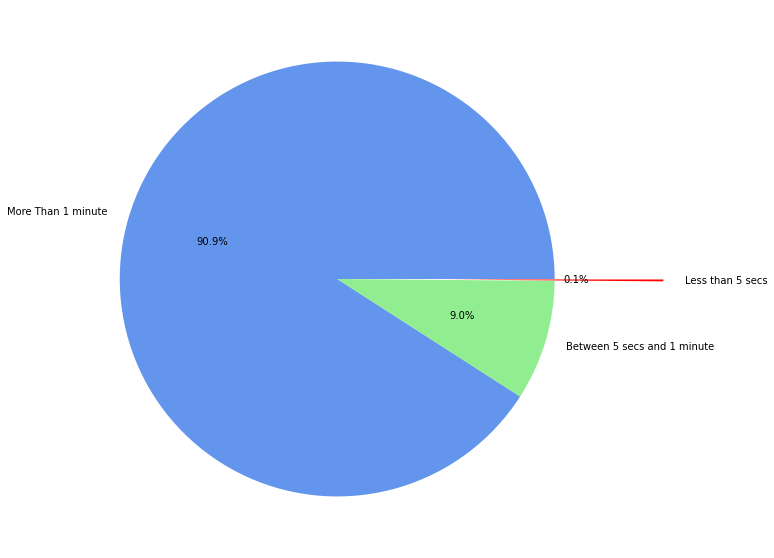

In [14]:
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=0, colors = ['cornflowerblue', 'lightgreen', 'r'])
plt.show()

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = 40,
    title = 'Количество уроков с быстрым прохождением',
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = df2['delta_seconds'].median(),
    title = {'text': "Медианный интервал (сек)"},
    domain = {'row': 0, 'column': 1}))

fig.update_layout(
    grid = {'rows': 1, 'columns': 2, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Speed"},
        'mode' : "number+delta+gauge",
        'delta' : {'reference': 90}}]
                         }})

fig.show()

## Как называются эти (быстрые) уроки

(необходимо использовать lesson_id) - хорошо, но тогда они сливаются (см ниже)

In [16]:
lessons_data = pd.DataFrame(df['lesson_id'].value_counts()).reset_index()

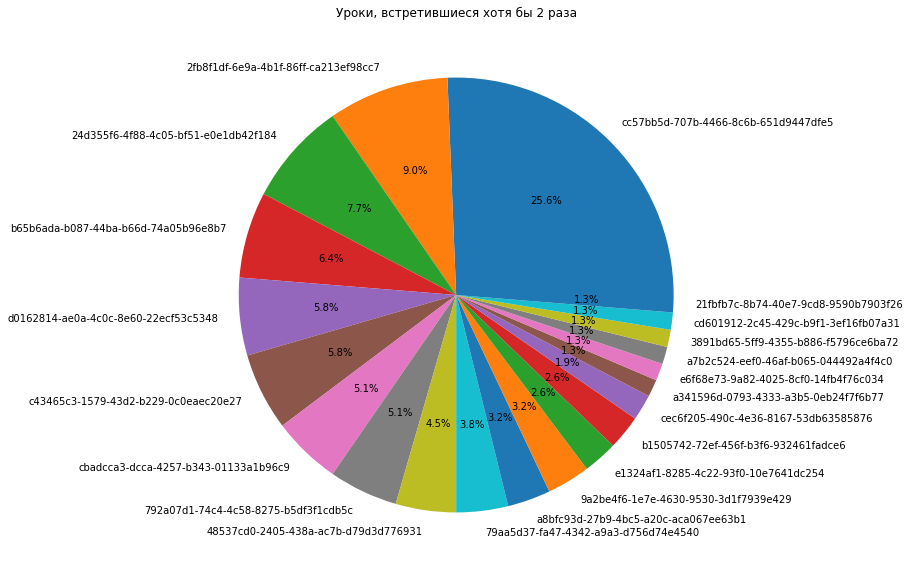

In [17]:
plt.figure(figsize=(10,10))
plt.title('Уроки, встретившиеся хотя бы 2 раза')
plt.pie(lessons_data[lessons_data['lesson_id'] > 1]['lesson_id'].to_list(), 
        labels=lessons_data[lessons_data['lesson_id'] > 1]['index'].to_list(), autopct='%1.1f%%',
        shadow=False, startangle=0)
plt.show()

### И отдельно выведем список уроков, пройденных слишком быстро только 1 раз (чтобы не сливались на графике)

In [18]:
lessons_data[lessons_data['lesson_id'] > 1]['index']

0     cc57bb5d-707b-4466-8c6b-651d9447dfe5
1     2fb8f1df-6e9a-4b1f-86ff-ca213ef98cc7
2     24d355f6-4f88-4c05-bf51-e0e1db42f184
3     b65b6ada-b087-44ba-b66d-74a05b96e8b7
4     d0162814-ae0a-4c0c-8e60-22ecf53c5348
5     c43465c3-1579-43d2-b229-0c0eaec20e27
6     cbadcca3-dcca-4257-b343-01133a1b96c9
7     792a07d1-74c4-4c58-8275-b5df3f1cdb5c
8     48537cd0-2405-438a-ac7b-d79d3d776931
9     79aa5d37-fa47-4342-a9a3-d756d74e4540
10    a8bfc93d-27b9-4bc5-a20c-aca067ee63b1
11    9a2be4f6-1e7e-4630-9530-3d1f7939e429
12    e1324af1-8285-4c22-93f0-10e7641dc254
13    b1505742-72ef-456f-b3f6-932461fadce6
14    cec6f205-490c-4e36-8167-53db63585876
15    a341596d-0793-4333-a3b5-0eb24f7f6b77
16    e6f68e73-9a82-4025-8cf0-14fb4f76c034
17    a7b2c524-eef0-46af-b065-044492a4f4c0
18    3891bd65-5ff9-4355-b886-f5796ce6ba72
19    cd601912-2c45-429c-b9f1-3ef16fb07a31
20    21fbfb7c-8b74-40e7-9cd8-9590b7903f26
Name: index, dtype: object